In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


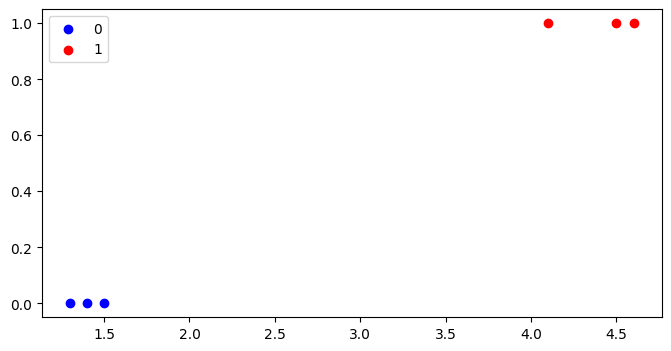

In [2]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/231011/code/iris_1D_2c.csv',
                     dtype=None,
                     delimiter=',',
                     skip_header=1)
X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()
plt.show()

In [3]:
N = 6 # numbers of samples
k = 2 # number of classes

# one_hot
import numpy as np

def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print('y_one_hot\n', y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print('X\n', X)

y_one_hot
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
X
 [[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [4]:
# initialize parameters
theta = np.array([[0.1, 0.05],
                  [0.2, -0.1]])
print('theta:\n', theta)

theta:
 [[ 0.1   0.05]
 [ 0.2  -0.1 ]]


In [5]:
# some parameters
learning_rate = 0.1
losses = []
max_epoch = 1

for epoch in range(max_epoch):
    for i in range(N):
        xi = X[i]
        yi = y_one_hot[i]

        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))

        # compute z
        z = theta.T.dot(xi)

        # compute y_hat
        exp_z = np.exp(z)
        y_hat = exp_z / np.sum(exp_z, axis=0)

        # compute the loss
        loss = -np.log(yi.T.dot(y_hat))
        losses.append(loss[0])

        # compute the gradient dz
        dz = y_hat - yi

        # compute dtheta
        dtheta = xi.dot(dz.T)

        # update
        theta = theta - learning_rate*dtheta
        break

In [6]:
print(theta)

[[ 0.13846162  0.01153838]
 [ 0.25384627 -0.15384627]]


## One Cell

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

iris = np.genfromtxt('/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/231011/code/iris_1D_2c.csv',
                     dtype=None,
                     delimiter=',',
                     skip_header=1)
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

N = 6 # numbers of samples
k = 2 # number of classes

y_one_hot = convert_one_hot(y, k)
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

theta = np.array([[0.1, 0.05],
                  [0.2, -0.1]])

# some parameters
learning_rate = 0.1
max_epoch = 1

for epoch in range(max_epoch):
    for i in range(N):
        xi = X[i]
        yi = y_one_hot[i]

        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))

        print(f'xi: {xi}')
        print(f'yi: {yi}')

        # compute z
        z = theta.T.dot(xi)
        print(f'z: {z}')

        # compute y_hat
        exp_z = np.exp(z)
        y_hat = exp_z / np.sum(exp_z, axis=0)

        # compute the loss
        loss = -np.log(yi.T.dot(y_hat))
        print(f'loss: {loss}')

        # compute the gradient dz
        dz = y_hat - yi

        # compute dtheta
        dtheta = xi.dot(dz.T)

        # update
        theta = theta - learning_rate*dtheta
        break

print(theta)

xi: [[1. ]
 [1.4]]
yi: [[1.]
 [0.]]
z: [[ 0.38]
 [-0.09]]
loss: [[0.48550921]]
[[ 0.13846162  0.01153838]
 [ 0.25384627 -0.15384627]]
